# Import Dataset

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
csv_url='https://raw.githubusercontent.com/sumeyyeozel/csv/main/insurance.csv'
insurance=pd.read_csv(csv_url)

# Explorative Data Analyse

In [243]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [244]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [245]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [246]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [247]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [248]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [249]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [250]:
pd.DataFrame(insurance['sex'].value_counts())

,sex
male,676
female,662


In [251]:
pd.DataFrame(insurance['smoker'].value_counts())

,smoker
no,1064
yes,274


In [252]:
pd.DataFrame(insurance['region'].value_counts())

,region
southeast,364
northwest,325
southwest,325
northeast,324


In [253]:
region_dum= pd.get_dummies(insurance['region'], drop_first=True)
region_dum.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [254]:
df=insurance[['age', 'bmi', 'children','charges']]
df

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [255]:
df_new = pd.concat([insurance, region_dum], axis=1)
df_new

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,1


In [256]:
pd.DataFrame(df['children'].value_counts())

,children
0,574
1,324
2,240
3,157
4,25
5,18


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9fbde80d0>,
      dtype=object)

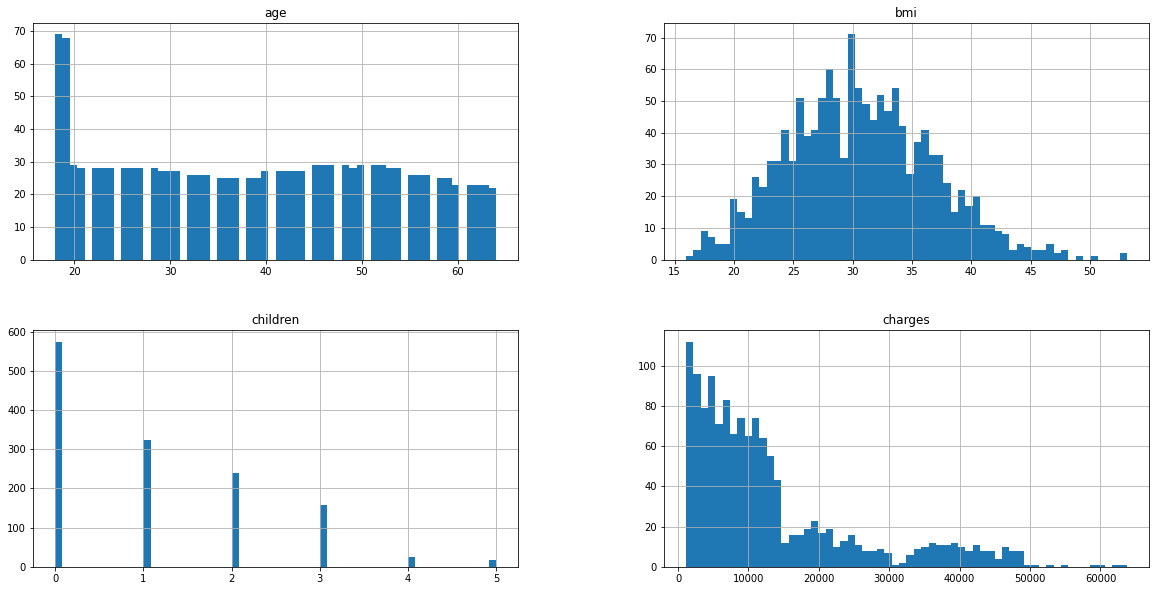

In [257]:
df.hist(bins= 60, figsize=(20,10))

In [258]:
old= df[df['age']>=50]
old

,age,bmi,children,charges
9,60,25.84,0,28923.13692
11,62,26.29,0,27808.72510
13,56,39.82,0,11090.71780
16,52,30.78,1,10797.33620
18,56,40.30,0,10602.38500
...,...,...,...,...
1329,52,38.60,2,10325.20600
1330,57,25.74,2,12629.16560
1332,52,44.70,3,11411.68500
1333,50,30.97,3,10600.54830


In [259]:
young= df[df['age']<=30]
young

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
10,25,26.220,0,2721.32080
12,23,34.400,0,1826.84300
...,...,...,...,...
1328,23,24.225,2,22395.74424
1331,23,33.400,0,10795.93733
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350


In [260]:
mid=df[(df['age']>30) & (df['age']<50)]
mid

,age,bmi,children,charges
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
5,31,25.740,0,3756.62160
6,46,33.440,1,8240.58960
7,37,27.740,3,7281.50560
...,...,...,...,...
1319,39,26.315,2,7201.70085
1320,31,31.065,3,5425.02335
1323,42,40.370,2,43896.37630
1324,31,25.935,1,4239.89265


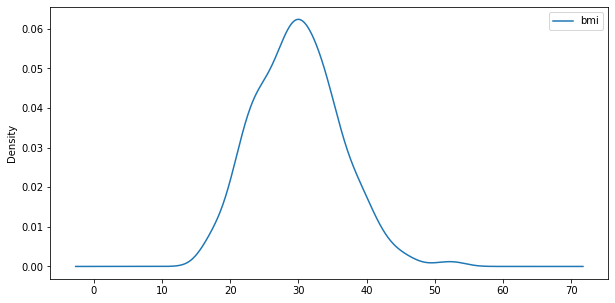

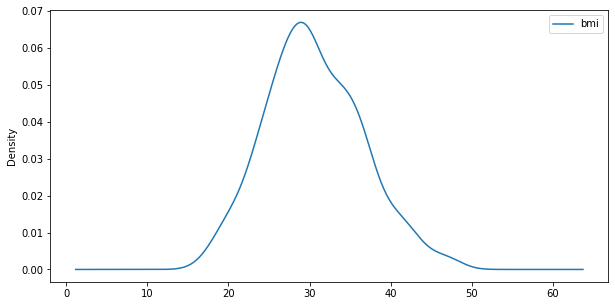

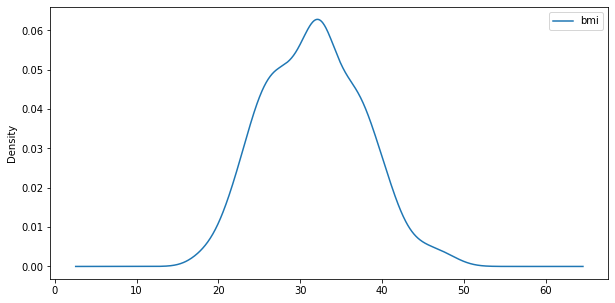

In [261]:
young[['age', 'bmi']].plot(kind='density', x='age', y='bmi', figsize=(10,5))
mid[['age', 'bmi']].plot(kind='density', x='age', y='bmi', figsize=(10,5))
old[['age', 'bmi']].plot(kind='density', x='age', y='bmi', figsize=(10,5))

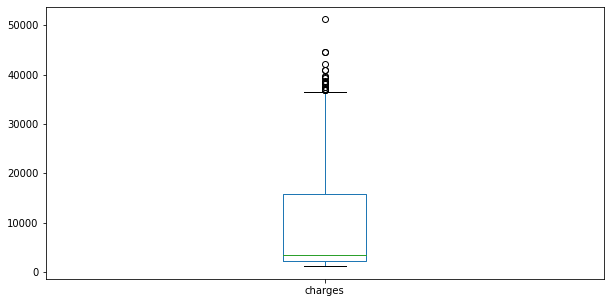

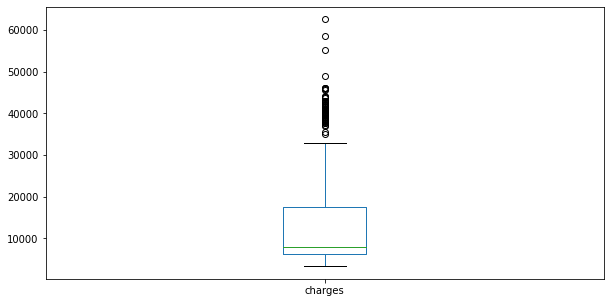

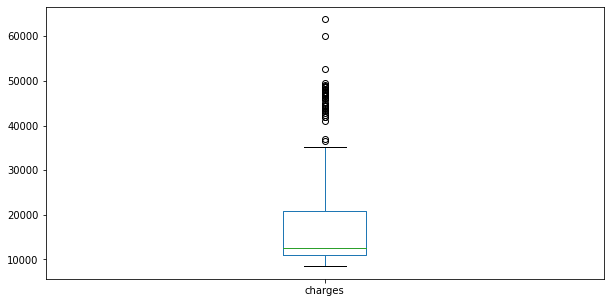

In [262]:
young[['age', 'charges']].plot(kind='box', x='age', y='charges', figsize=(10,5))
mid[['age', 'charges']].plot(kind='box', x='age', y='charges', figsize=(10,5))
old[['age', 'charges']].plot(kind='box', x='age', y='charges', figsize=(10,5))

Mit zunehmendem Alter sinken die Gebühren, was man am Median ablesen kann. Je länger die Box, desto verteilter sind die Daten. Je kleiner die Box, desto weniger verstreut sind die Daten.

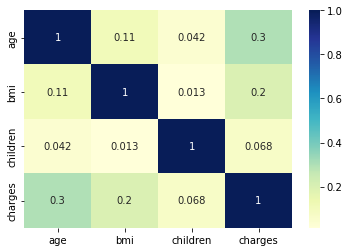

In [263]:
ax = sns.heatmap(data = df.corr(),cmap='YlGnBu',annot=True)

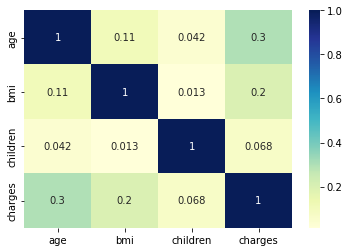

In [264]:
ax =sns.heatmap(data= insurance.corr(), cmap='YlGnBu', annot=True)

Korrelationswert ist zwischen den Merkmalen sehr niedrig. Sogar die höchste Korrelationswert ist gering.

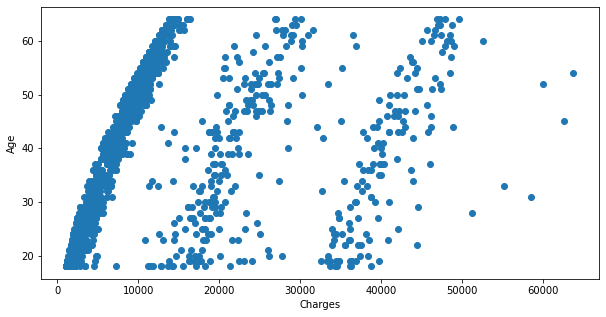

In [265]:
fig, ax=plt.subplots(figsize=(10,5))
plt.scatter(df['charges'], df['age'])
ax.set_xlabel('Charges')
ax.set_ylabel('Age')
plt.show()

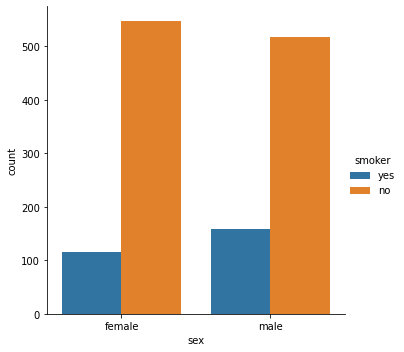

In [266]:
sns.catplot(x="sex", kind='count',hue='smoker', data=insurance[['sex', 'smoker']], order=['female','male'])

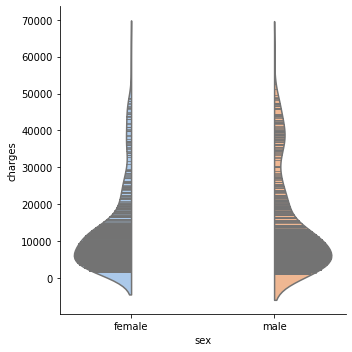

In [267]:
sns.catplot(x="sex", y="charges", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=insurance)

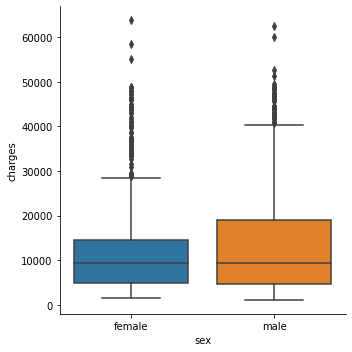

In [268]:
sns.catplot(x="sex", y="charges", hue="sex",
            kind="box", dodge=False, data=insurance)

Deshalb rauchen Die Maenner mehr als die Frauen, kann man der sowohl Medianwert des Maenner als auch charges höher als Frauen.




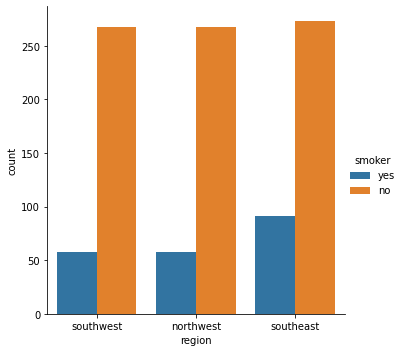

In [269]:
sns.catplot(x="region", kind='count',hue='smoker', data=insurance[['region', 'smoker']], order=['southwest','northwest','southeast'])

# Modelling

Linear Regression

In [285]:
from sklearn.model_selection import train_test_split
X = df
y = df['charges']

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=444)

In [287]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)



X_train shape: (936, 4)
X_test shape: (402, 4)
y_train shape: (936,)
y_test shape: (402,)


In [288]:
X_train

,age,bmi,children,charges
1081,32,27.835,1,4454.40265
479,23,32.560,0,1824.28540
849,55,32.775,0,10601.63225
1077,21,26.030,0,2102.26470
1271,25,34.485,0,3021.80915
...,...,...,...,...
948,42,31.255,0,6358.77645
67,40,26.315,1,6389.37785
1288,20,39.400,2,38344.56600
791,19,27.600,0,1252.40700


In [289]:
from sklearn.preprocessing import StandardScaler
standard_X = StandardScaler()

In [290]:
X_train = standard_X.fit_transform(X_train)
X_test = standard_X.fit_transform(X_test)

In [291]:
X_train

array([[-0.51884736, -0.4678058 , -0.05802889, -0.71258676],
       [-1.16531535,  0.31104869, -0.89364493, -0.93707206],
       [ 1.13323753,  0.34648863, -0.89364493, -0.18790951],
       ...,
       [-1.38080469,  1.43853329,  0.77758714,  2.18000042],
       [-1.45263446, -0.50654247, -0.89364493, -0.98588292],
       [ 0.34310997, -0.93511849, -0.05802889, -0.44209699]])

In [292]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train,y_train)

In [327]:
reg.score(X_test,y_test)

0.9770346468175014

Random Forest

In [305]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_jobs = -1,n_estimators = 50,criterion = "mae",max_depth=3)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mae', max_depth=3, n_estimators=50, n_jobs=-1)

In [306]:
clf.score(X_test, y_test)

0.9734819510529493